In [1]:
%run "docker_extract.py"
# import sys
# sys.path.insert(0, ".")

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from ipynb.fs.full.docker_extract import ExtractData 
from ipynb.fs.full.transformation_df import Transformation 
# from docker_extract import ExtractData


parent_dir=os.path.dirname(os.getcwd())
data_extractor=ExtractData()
df=pd.read_csv(os.path.join(parent_dir,"test_dataframe.csv"),index_col=0)

df.dropna(how='all', axis=1, inplace=True)
df.drop(["match_id.1","has_stats"],axis=1,inplace=True)
df=df[df['outcome'] != "RET"]
display(df.columns)

Index(['match_id', 'tournament_event_id', 'match_num', 'date', 'surface',
       'indoor', 'round', 'best_of', 'winner_id', 'winner_country_id',
       'winner_seed', 'winner_entry', 'winner_rank', 'winner_rank_points',
       'winner_elo_rating', 'winner_next_elo_rating', 'winner_age',
       'winner_height', 'loser_id', 'loser_country_id', 'loser_seed',
       'loser_entry', 'loser_rank', 'loser_rank_points', 'loser_elo_rating',
       'loser_next_elo_rating', 'loser_age', 'loser_height', 'score',
       'outcome', 'w_sets', 'l_sets', 'w_games', 'l_games', 'w_tbs', 'l_tbs',
       'set', 'minutes', 'w_ace', 'w_df', 'w_sv_pt', 'w_1st_in', 'w_1st_won',
       'w_2nd_won', 'w_sv_gms', 'w_bp_sv', 'w_bp_fc', 'l_ace', 'l_df',
       'l_sv_pt', 'l_1st_in', 'l_1st_won', 'l_2nd_won', 'l_sv_gms', 'l_bp_sv',
       'l_bp_fc'],
      dtype='object')

In [2]:
import numpy as np

data_trans = Transformation(df)
data_trans()
new_df=data_trans.get_dataframe()
new_df.drop(['w_1st_in','l_1st_in'],axis=1,inplace=True)
new_df=new_df[~new_df.isin([np.nan, np.inf, -np.inf]).any(1)]


# print(new_df[new_df.iloc[0]>1])

<AxesSubplot:>

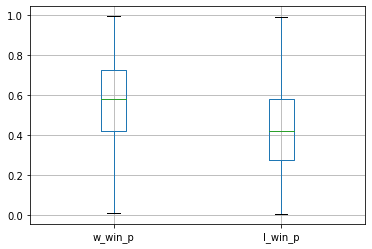

In [3]:
new_df.boxplot(['w_win_p','l_win_p'])

In [4]:
data_extractor.get_match_details(114497)

,outcome,match_id,date,first_name,last_name,first_name,last_name
0,None,114497,2000-06-12,Justin,Gimelstob,Vincent,Spadea


In [5]:
import researchpy as rp

def ttest(column):
    return rp.ttest(group1=new_df["w"+column], group1_name= "Winner",
                    group2=new_df["l"+column], group2_name= "Loser")

In [6]:
columns=[column[1:] for column in new_df.columns if "w_" in column]

ttest_df=pd.DataFrame([])

for column in columns:
    data=[column[1:]]
    result=ttest(column)
    data.append(str(int(result[0]['N'][0])))
    data.append(str(round(result[0]['Mean'][0],2)))
    data.append(str(round(result[0]['Mean'][1],2)))
    data.append(str(round(result[1].iloc[0][1],2)))
    data.append(str(result[1].iloc[4][1]))
    data.append(str(result[1].iloc[5][1]))
    ttest_df=ttest_df.append(pd.Series(data),ignore_index=True)

ttest_df.columns=['Variable','N','Mean Winner','Mean Loser','Difference','Dif. < 0 p value','Dif. > 0 p value']
display(ttest_df)

print(ttest_df.to_latex(index=False))  




,Variable,N,Mean Winner,Mean Loser,Difference,Dif. < 0 p value,Dif. > 0 p value
0,ace,25639,0.08,0.06,0.02,1.0,0.0
1,df,25639,0.04,0.05,-0.01,0.0,1.0
2,tt_p,25639,0.54,0.46,0.08,1.0,0.0
3,sv_w,25639,0.66,0.57,0.08,1.0,0.0
4,1st_w,25639,0.74,0.66,0.08,1.0,0.0
5,2nd_w,25639,0.53,0.45,0.08,1.0,0.0
6,bp_save,25639,0.57,0.51,0.06,1.0,0.0
7,r_1st_w,25639,0.34,0.26,0.08,1.0,0.0
8,bp_w,25639,0.49,0.43,0.06,1.0,0.0
9,rp_w,25639,0.43,0.34,0.08,1.0,0.0


\begin{tabular}{lllllll}
\toprule
    Variable &     N & Mean Winner & Mean Loser & Difference & Dif. < 0 p value & Dif. > 0 p value \\
\midrule
         ace & 25639 &        0.08 &       0.06 &       0.02 &              1.0 &              0.0 \\
          df & 25639 &        0.04 &       0.05 &      -0.01 &              0.0 &              1.0 \\
        tt\_p & 25639 &        0.54 &       0.46 &       0.08 &              1.0 &              0.0 \\
        sv\_w & 25639 &        0.66 &       0.57 &       0.08 &              1.0 &              0.0 \\
       1st\_w & 25639 &        0.74 &       0.66 &       0.08 &              1.0 &              0.0 \\
       2nd\_w & 25639 &        0.53 &       0.45 &       0.08 &              1.0 &              0.0 \\
     bp\_save & 25639 &        0.57 &       0.51 &       0.06 &              1.0 &              0.0 \\
     r\_1st\_w & 25639 &        0.34 &       0.26 &       0.08 &              1.0 &              0.0 \\
        bp\_w & 25639 &        0

In [7]:
from scipy.stats import chi2_contingency
import seaborn as sns
from tqdm import tqdm
def ch_calculate(df):
    factors_paired = [(i,j) for i in df.columns.values for j in df.columns.values] 

    chi2, p_values =[], []

    for f in tqdm(factors_paired):
        if f[0] != f[1]:
            chitest = chi2_contingency(pd.crosstab(df[f[0]], df[f[1]]))   
            chi2.append(chitest[0])
            p_values.append(chitest[1])
        else:      # for same factor pair
            chi2.append(0)
            p_values.append(0)

    chi2 = np.array(chi2).reshape((len(df.columns),len(df.columns))) # shape it as a matrix
    chi2 = pd.DataFrame(chi2, index=df.columns.values, columns=df.columns.values) # then a df for convenience
    return chi2
    

chi_square=ch_calculate(new_df[[i for i in new_df.columns if "w_" in i]])

  4%|▍         | 51/1156 [01:13<26:24,  1.43s/it]  


KeyboardInterrupt: 

NameError: name 'chi_square' is not defined

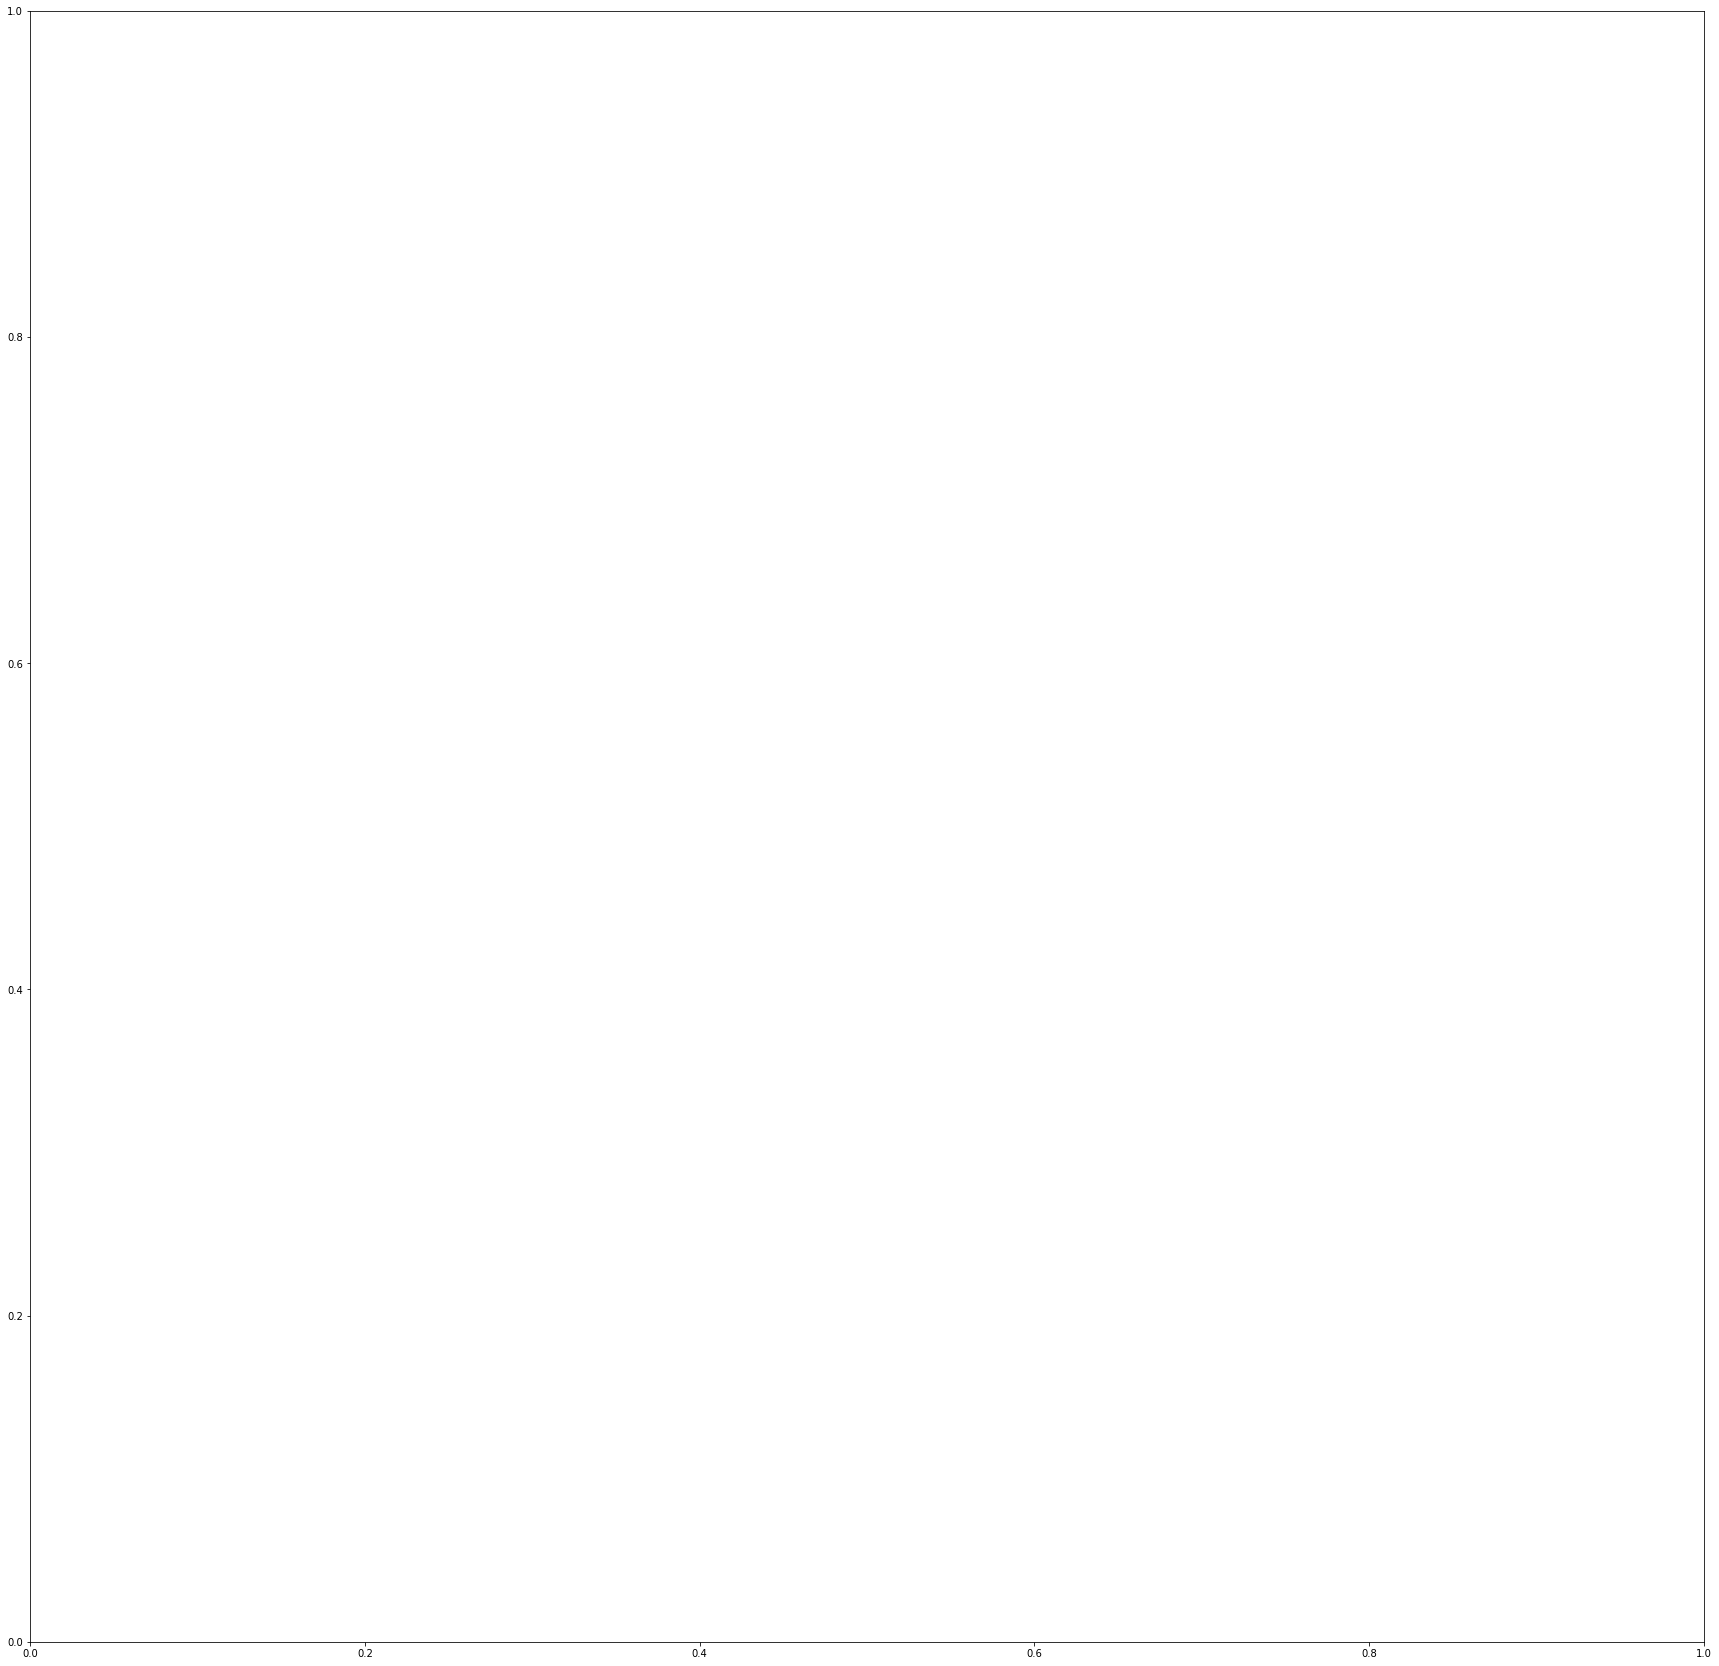

In [8]:
fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(chi_square,vmin=0, vmax=3500)
plt.show()